In [1]:
import glob
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from os.path import join

In [9]:
data = pd.read_csv("eval_data.csv")
netfile_vals = []
for val in data["netfile"]:
    filtered_val = val.split(os.sep)[-1].split(".")[0]
    netfile_vals.append(filtered_val)
data["netfile"] = netfile_vals
data.head()

C:\Users\Nathaniel\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,netfile,ranked,agent_type,kind,tls_id,episode,cum_reward,reward,step
0,0,complex_inter,True,ppo,fedrl,gneJ0,1,-0.333333,-0.333333,0
1,1,complex_inter,True,ppo,fedrl,gneJ1,1,0.000000,-0.000000,0
2,2,complex_inter,True,ppo,fedrl,gneJ13,1,0.000000,-0.000000,0
3,3,complex_inter,True,ppo,fedrl,gneJ2,1,0.000000,-0.000000,0
4,4,complex_inter,True,ppo,fedrl,gneJ3,1,0.000000,-0.000000,0


In [10]:
def load_data(trainer, topo, ranked) -> pd.DataFrame:
    """This function simply merges all the latest training data into
       a single Pandas DataFrame object for straightforward analysis.

    Args:
        trainer (str): Name of the trainer type.
        topo (str): Name of the topology.
        ranked (bool): Whether ranked or not.

    Returns:
        pd.DataFrame -- Merged data set of latest training processes.
    """
    directory = join("out", "data", trainer, topo)
    ranked = "ranked" if ranked else "unranked"
    path = sorted(glob.glob(join(directory, f"{ranked}_*.csv")))[-1]
    data = pd.read_csv(path)
    return data

dataframes = []
for trainer in ["FedRL", "MARL", "SARL"]:
    for topo in ["complex_inter", "single_inter", "two_inter"]:
        for ranked in [True, False]:
            df = load_data(trainer, topo, ranked)
            df["trainer"] = [trainer] * len(df)
            df["netfile"] = [topo]    * len(df)
            df["ranked"]  = [ranked]  * len(df)
            dataframes.append(df)

training_data = pd.concat(dataframes)

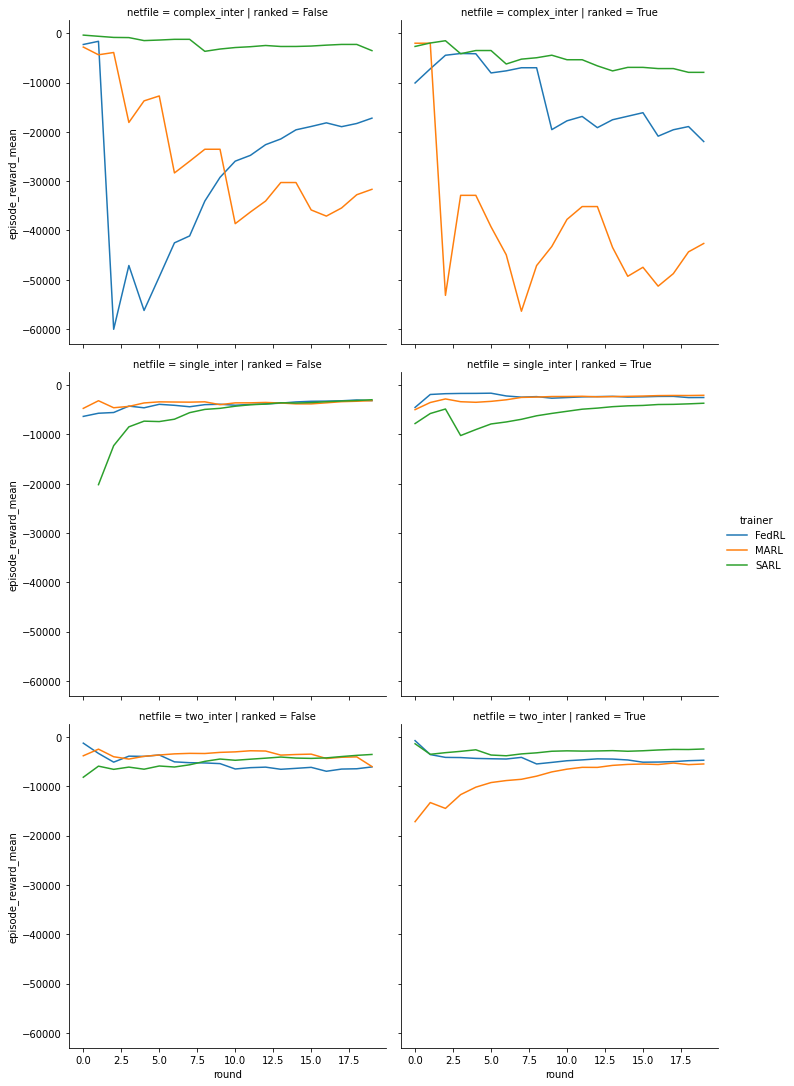

In [11]:
sns.relplot(
    data=training_data, 
    kind="line", 
    col="ranked",
    row="netfile",
    hue="trainer",
    x="round", 
    y="episode_reward_mean", 
    ci=None
)
plt.show()

# Initial Observation (SARL)
It is... bizarre that SARL is doing so poorly relative to MARL and FedRL in the `single_inter` road network. The reason this is strange is that thre isn't really a logical difference between SARL and the multi-agent approaches (i.e., MARL and FedRL). In all cases, there is only *one* policy being trained under `single_inter`.

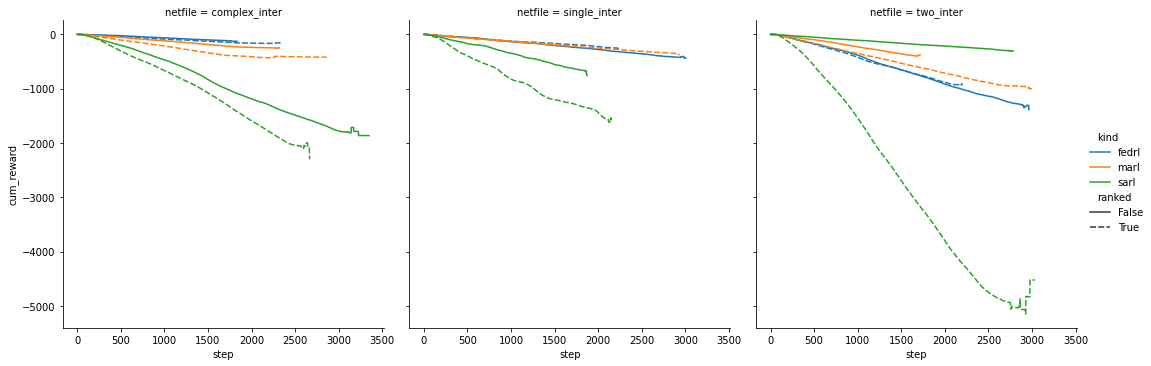

In [12]:
sns.relplot(data=data, kind="line", style="ranked", hue="kind", col="netfile", x="step", y="cum_reward", ci=None)
plt.savefig("reward_over_time.pdf")
plt.show()

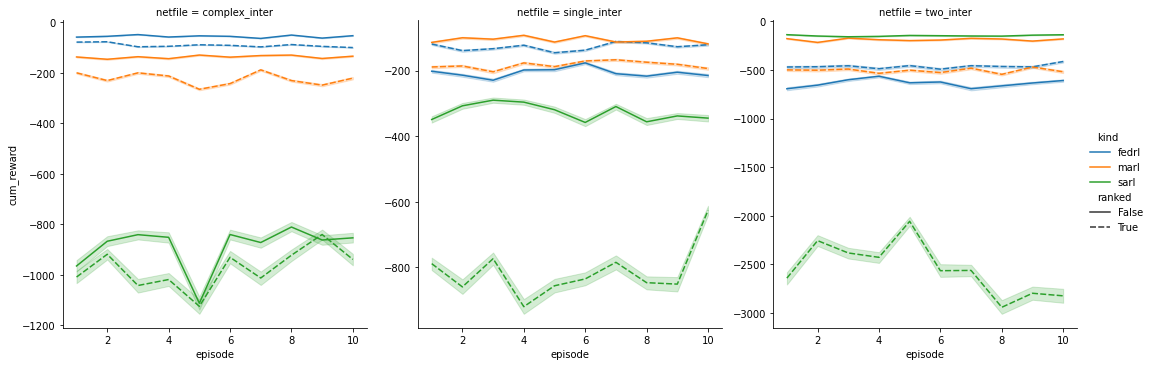

In [13]:
g = sns.relplot(data=data, kind="line", style="ranked", hue="kind", col="netfile", x="episode", y="cum_reward", facet_kws={"sharey": False})
plt.show()

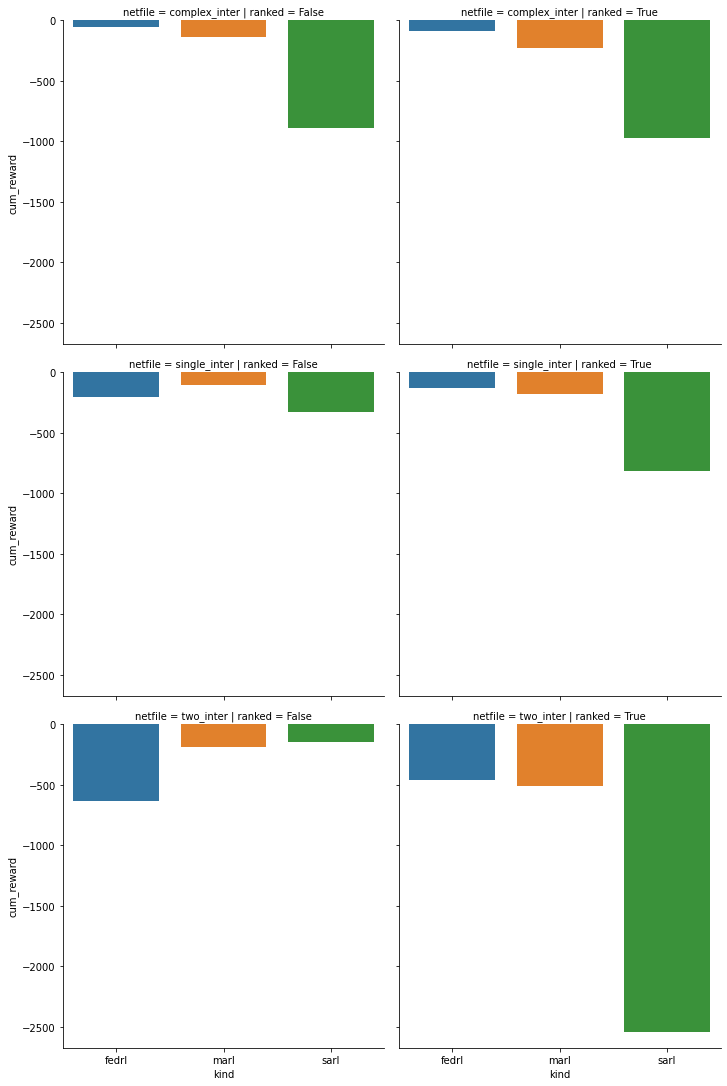

In [14]:
sns.catplot(data=data, kind="bar", col="ranked", row="netfile", x="kind", y="cum_reward", ci=None)
plt.savefig("ranked_v_unranked.pdf")
plt.show()

In [15]:
# list(training_data.columns)
training_data.dtypes

Unnamed: 0                    int64
round                         int64
trainer                      object
policy                       object
fed_round                    object
episode_reward_max          float64
episode_reward_min          float64
episode_reward_mean         float64
episode_len_mean            float64
episodes_this_iter            int64
policy_reward_min            object
policy_reward_max            object
policy_reward_mean           object
custom_metrics               object
hist_stats                   object
sampler_perf                 object
off_policy_estimator         object
num_healthy_workers           int64
timesteps_total               int64
timers                       object
info                         object
done                           bool
episodes_total                int64
training_iteration            int64
experiment_id                object
date                         object
timestamp                     int64
time_this_iter_s            